EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd



In [2]:
# Load the Excel file
file_path = 'online_retail_II.xlsx'
xls = pd.ExcelFile(file_path)



df_2009_2010 = pd.read_excel(xls, sheet_name='Year 2009-2010')
df_2010_2011 = pd.read_excel(xls, sheet_name='Year 2010-2011')

# Optionally, you can concatenate both DataFrames if needed
combined_df = pd.concat([df_2009_2010, df_2010_2011])

# Display the first few rows of the combined DataFrame
print(combined_df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [3]:
df_2009_2010.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [4]:
df_2010_2011.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
combined_df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom


In [6]:


# Check for missing values in each column of the combined DataFrame
print(combined_df.isnull().sum())



Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [7]:
combined_df= combined_df.dropna(subset=['Customer ID'])

In [8]:
combined_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
combined_df.duplicated().sum()


26479

In [10]:
combined_df = combined_df.drop_duplicates() 

In [11]:
combined_df.duplicated().sum()

0

In [12]:
from datetime import datetime 
from datetime import timedelta 
convert_dict = {'InvoiceDate': str} 
combined_df= combined_df.astype(convert_dict) 
print(combined_df.dtypes)

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [13]:
combined_df['InvoiceDate'] = pd.to_datetime(combined_df['InvoiceDate'])


In [14]:
combined_df['order_date'] = [d.date() for d in combined_df['InvoiceDate']]


In [15]:
combined_df['order_time'] = [d.time() for d in combined_df['InvoiceDate']]


In [16]:
combined_df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00


In [17]:
combined_df.head(4)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00


In [18]:
import datetime  # Ensure this line is at the top of your script

# Convert string to datetime object
date = datetime.datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')


In [19]:
combined_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,797885.000000,797885,797885.000000,797885.000000
mean,12.602980,2011-01-02 13:17:34.141160704,3.702732,15313.062777
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 09:47:00,1.250000,13964.000000
50%,5.000000,2010-12-02 12:33:00,1.950000,15228.000000
75%,12.000000,2011-07-31 15:50:00,3.750000,16788.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,191.670371,NaN,71.392549,1696.466663


In [20]:
combined_df=combined_df[(combined_df['Quantity']>0) & (combined_df['Price']>0)] 
combined_df.describe()
# The Quantity column has values greater than 0. This typically means you are excluding records where the quantity is zero or negative, which might indicate returns, errors, or non-sales transactions.
# The Price column has values greater than 0. This excludes records where the price is zero or negative, which could also indicate errors or special cases like giveaways.


,Quantity,InvoiceDate,Price,Customer ID
count,779425.000000,779425,779425.000000,779425.000000
mean,13.489370,2011-01-03 01:44:42.593475584,3.218488,15320.360461
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000
std,145.855814,NaN,29.676140,1695.692775


IDENTIFYING OUTLIERS

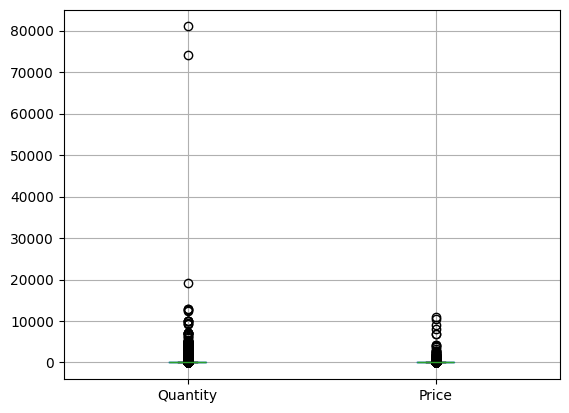

In [21]:
import matplotlib.pyplot as plt
combined_df.boxplot(column=['Quantity', 'Price'])
plt.show()


In [22]:
# Select only numeric columns from the DataFrame
numeric_cols = combined_df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = numeric_cols[(numeric_cols < lower_bound) | (numeric_cols > upper_bound)]

# Display the outliers
outliers = outliers.dropna(how='all')  # Drop rows where all columns are NaN
print(outliers)


        Quantity  Price  Customer ID
3           48.0    NaN          NaN
22           NaN   8.50          NaN
35           NaN   9.95          NaN
38           NaN   8.95          NaN
54          28.0    NaN          NaN
...          ...    ...          ...
541866      36.0    NaN          NaN
541867      72.0    NaN          NaN
541868      48.0    NaN          NaN
541892       NaN   8.95          NaN
541909       NaN  18.00          NaN

[116052 rows x 3 columns]


In [23]:
combined_df_capped = combined_df.copy()
for col in numeric_cols.columns:
    combined_df_capped[col] = combined_df_capped[col].clip(lower_bound[col], upper_bound[col])


In [24]:
combined_df_capped.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00


In [25]:
combined_df_capped.describe()
# Yes, this is okay, if your goal was to reduce the impact of extreme outliers in the Quantity and Price columns. The results show that the capping process worked as intended, leading to more moderate statistics in both columns. This will generally lead to more robust statistical analyses that aren't overly influenced by extreme values.

,Quantity,InvoiceDate,Price,Customer ID
count,779425.000000,779425,779425.000000,779425.000000
mean,8.285808,2011-01-03 01:44:42.593475584,2.654312,15320.360461
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000
std,8.083299,NaN,2.120267,1695.692775


 The RFM values can be grouped in several ways. We are going to implement percentile-based grouping.

In [26]:
combined_df_capped['TotalSum'] = combined_df_capped['Price'] * combined_df_capped['Quantity']


In [27]:
import pandas as pd
import datetime as dt

# Ensure 'order_date' is in datetime format
combined_df_capped['order_date'] = pd.to_datetime(combined_df_capped['order_date'])

# Add new TotalSum column
combined_df_capped['TotalSum'] = combined_df_capped['Price'] * combined_df_capped['Quantity']

# Display minimum and maximum invoice dates
print('Min Invoice Date:', combined_df_capped['order_date'].dt.date.min(), 'Max Invoice Date:', combined_df_capped['order_date'].dt.date.max())

# Preview the DataFrame
combined_df_capped.head(3)

# Set the snapshot date to one day after the last purchase date
snapshot_date = combined_df_capped['order_date'].max() + dt.timedelta(days=1)
print('Snapshot Date:', snapshot_date)


Min Invoice Date: 2009-12-01 Max Invoice Date: 2011-12-09
Snapshot Date: 2011-12-10 00:00:00


In [28]:
combined_df_capped.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time,TotalSum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0


 Calculate RFM Metrics

In [30]:
rfm = combined_df_capped.groupby(['Customer ID']).agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'count',
    'TotalSum': 'sum'
})
rfm

# f.groupby(['CustomerID']): Groups the data by CustomerID, meaning that all transactions for each customer will be aggregated together.

# agg(): This function allows you to apply different aggregation functions to different columns.

# 'order_date': lambda x: (snapshot_date - x.max()).days: This lambda function calculates the Recency by finding the difference in days between the snapshot date (snapshot_date) and the most recent purchase date (x.max()). The result tells you how many days it has been since the customer's last purchase.

# 'InvoiceNo': 'count': This counts the number of invoices (transactions) for each customer, giving you the Frequency of their purchases.

# 'TotalSum': 'sum': This sums up the total amount spent by each customer across all their transactions, representing the Monetary Value.

,order_date,Invoice,TotalSum
Customer ID,,,
12346.0,326,34,400.94
12347.0,3,222,4473.22
12348.0,76,51,779.73
12349.0,19,175,3347.99
12350.0,311,17,301.90
...,...,...,...
18283.0,4,938,2631.25
18284.0,432,28,374.03
18285.0,661,12,229.55


In [31]:
rfm.rename(columns={'order_date':'Recency','Invoice':'Frequency','TotalSum':'MonetaryValue'}, inplace=True)


In [32]:
rfm.head()
# Customer 12347.0: This customer has a very low Recency value (3 days), indicating they made a purchase very recently. They also have high Frequency (222 purchases) and high Monetary Value ($4,473.22), making them a very valuable customer.

# Customer 12346.0: This customer has a high Recency value (326 days), meaning they haven't made a purchase in a long time. They also have relatively low Frequency (34 purchases) and lower Monetary Value ($400.94) compared to others. This customer may need re-engagement.

# Customer 12349.0: With a Recency of 19 days, this customer has made a purchase recently. They have a high Frequency (175 purchases) and a significant Monetary Value ($3,347.99), indicating that they are also a valuable customer.



,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,326,34,400.94
12347.0,3,222,4473.22
12348.0,76,51,779.73
12349.0,19,175,3347.99
12350.0,311,17,301.90


Building RFM Segments and RFM Score

In [33]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)
 # r_labels: These labels (4, 3, 2, 1) are assigned to the Recency quartiles. A Recency value of 4 means the customer is very recent (highly engaged), and 1 means they are not recent (less engaged).

# f_labels and m_labels: These labels (1, 2, 3, 4) are assigned to the Frequency and MonetaryValue quartiles, where 4 represents the highest frequency and monetary value, and 1 represents the lowest.

In [34]:
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)

# pd.qcut(): This function divides the data into four equal-sized quartiles for each of the R, F, and M metrics.

# Assigning Labels: After dividing the data into quartiles, each customer is assigned a label according to their quartile position. For instance, a customer in the top 25% for Recency will receive a label of 4, and one in the bottom 25% will receive a label of 1.

In [35]:
rfm = rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)
# assign(): This method is used to add the quartile labels as new columns (R, F, M) to the rfm DataFrame.

In [36]:
def add_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(add_rfm, axis=1)

# add_rfm Function: This function creates a unique RFM segment code for each customer by concatenating their R, F, and M labels into a single string.

# For example, if a customer has R=3, F=2, and M=4, their RFM_Segment will be "324".
# apply(): This function applies add_rfm to each row of the DataFrame, creating the RFM_Segment column.

In [37]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
# RFM_Score: The sum of the R, F, and M scores. This gives a single score that combines all three metrics.
# A higher RFM_Score indicates a more valuable customer, as they are recent, frequent, and spend more.

In [38]:
rfm.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,326,34,400.94,2,2,2,2.02.02.0,6
12347.0,3,222,4473.22,4,4,4,4.04.04.0,12
12348.0,76,51,779.73,3,2,3,3.02.03.0,8
12349.0,19,175,3347.99,4,4,4,4.04.04.0,12
12350.0,311,17,301.90,2,1,2,2.01.02.0,5


 Summary metrics per RFM Score

In [39]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)
# Grouping by RFM_Score: The groupby('RFM_Score') function groups the data by the RFM_Score you calculated earlier.
# Aggregating Metrics:
# Recency: Calculates the mean recency for each RFM_Score group.
# Frequency: Calculates the mean frequency for each RFM_Score group.
# MonetaryValue: Calculates both the mean and count of monetary values for each RFM_Score group.
# round(1): Rounds the results to one decimal place for better readability.


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           543.3       8.8         138.1   556
4           376.4      16.4         210.9   585
5           310.5      23.9         341.6   611
6           228.1      34.2         476.7   622
7           198.2      51.0         731.0   599
8           151.3      72.7        1024.7   617
9            96.9     106.8        1451.2   544
10           72.7     170.0        2442.7   556
11           37.2     269.7        3897.8   556
12           10.8     555.6        9130.2   632

In [42]:
def segments(combined_df_capped):
    if combined_df_capped['RFM_Score'] > 9:
        return 'Gold'
    elif (combined_df_capped['RFM_Score'] > 5) and (combined_df_capped['RFM_Score'] <= 9):
        return 'Silver'
    else:
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments, axis=1)


In [43]:
rfm.groupby('General_Segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)
# Bronze Segment:

# Recency: 406.4 days on average since the last purchase.
# Frequency: Customers in this segment made an average of 16.6 purchases.
# Monetary Value: On average, these customers spent 233.4 units of currency.
# Count: There are 1,752 customers in this segment.


# Silver Segment:

# Recency: 170.7 days on average since the last purchase.
# Frequency: Customers made an average of 65.0 purchases.
# Monetary Value: On average, these customers spent 905.1 units of currency.
# Count: There are 2,382 customers in this segment.


# Gold Segment:

# Recency: 38.9 days on average since the last purchase.
# Frequency: These customers made an average of 341.5 purchases.
# Monetary Value: On average, these customers spent 5,330.1 units of currency.
# Count: There are 1,744 customers in this segment.

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            406.4      16.6         233.4  1752
Gold               38.9     341.5        5330.1  1744
Silver            170.7      65.0         905.1  2382

In [45]:
mdf = pd.merge(combined_df_capped, rfm, on='Customer ID')


In [46]:
# Creating data frames for each RFM segment
Bronze_seg = mdf[mdf.General_Segment == 'Bronze']  # Bronze segment
Silver_seg = mdf[mdf.General_Segment == 'Silver']  # Silver segment
Gold_seg = mdf[mdf.General_Segment == 'Gold']      # Gold segment

# Displaying the first few rows of each segment to verify
print("Bronze Segment:")
print(Bronze_seg.head())

print("\nSilver Segment:")
print(Silver_seg.head())

print("\nGold Segment:")
print(Gold_seg.head())


Bronze Segment:
   Invoice StockCode                        Description  Quantity  \
31  489437     22143  CHRISTMAS CRAFT HEART DECORATIONS         6   
32  489437     22145    CHRISTMAS CRAFT HEART STOCKING          6   
33  489437     22130   PARTY CONE CHRISTMAS DECORATION         12   
34  489437     21364           PEACE SMALL WOOD LETTERS         2   
35  489437     21360             JOY LARGE WOOD LETTERS         1   

           InvoiceDate  Price  Customer ID         Country order_date  \
31 2009-12-01 09:08:00   2.10      15362.0  United Kingdom 2009-12-01   
32 2009-12-01 09:08:00   2.10      15362.0  United Kingdom 2009-12-01   
33 2009-12-01 09:08:00   0.85      15362.0  United Kingdom 2009-12-01   
34 2009-12-01 09:08:00   6.75      15362.0  United Kingdom 2009-12-01   
35 2009-12-01 09:08:00   7.50      15362.0  United Kingdom 2009-12-01   

   order_time  TotalSum  Recency  Frequency  MonetaryValue  R  F  M  \
31   09:08:00      12.6      449         40         582.15 